In [1]:
# import compulsary libraries
import json
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly
import plotly.graph_objs as go 
import plotly.offline as pyo
import plotly.express as px

In [2]:
path_retaurants ='C:/Users/gongh/Desktop/SYS study file/data science/Data Science Application/Project/Restaurants.csv'
path_reviews = 'C:/Users/gongh/Desktop/SYS study file/data science/Data Science Application/Project/Yelp Dataset/reviews.json'

In [3]:
df_review = pd.read_json(path_reviews, lines=True,
                      dtype={'review_id':str,'user_id':str,
                             'business_id':str,'stars':int,
                             'date':str,'text':str,'useful':int,
                             'funny':int,'cool':int})
# note: adding the attribute of dtype can accerlate the reading speed

df_restaurants = pd.read_csv(path_retaurants)

Transfer datatime of the review to YEAR, MONTH, DAY, TIME

In [4]:
df_date = df_review['date'].apply(lambda x : datetime.strptime(x,'%Y-%m-%d %H:%M:%S')) #Y need be capital
df_review['year'] = df_date.apply(lambda x : str(x.year))
df_review['month'] = df_date.apply(lambda x : str(x.month))
df_review['day'] = df_date.apply(lambda x : str(x.day))
df_review['time'] = df_date.apply(lambda x : str(x.time()))
df_review = df_review.drop(columns = ['date'])
df_review.head(1)

,review_id,user_id,business_id,stars,useful,funny,cool,text,year,month,day,time
0,mM8i91yWP1QbImEvz5ds0w,TZQSUDDcA4ek5gBd6BzcjA,qUWqjjjfpB2-4P3He5rsKw,4,0,0,0,"In the heart of Chinatown, I discovered it enr...",2017,6,6,19:04:10


## We need to do the merge of two dataset

In [5]:
merged_Toronto_reviews = pd.merge(df_restaurants, df_review, on ='business_id', how = 'inner')

In [13]:
Toronto_reviews = merged_Toronto_reviews.drop(columns = ['Neighborhood','useful','funny','cool','nearest_geom','review_id','hours','geometry','review_count','state'])

In [14]:
Toronto_reviews.head()

,Borough,business_id,name,address,city,postal_code,LATITUDE,LONGITUDE,stars_x,attributes,categories,nearest_neighbourhood,user_id,stars_y,text,year,month,day,time
0,North York,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,3-1265 York Mills Road,Toronto,M3A 1Z3,43.765279,-79.326248,3.0,"{'NoiseLevel': ""'loud'"", 'BusinessParking': ""{...","Fast Food, Restaurants, Chicken Shop",Parkwoods-Donalda (45),t3BwepRLy_9x45nhNRginA,2,Why is your chicken so salty and your fries so...,2017,10,3,00:37:48
1,North York,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,3-1265 York Mills Road,Toronto,M3A 1Z3,43.765279,-79.326248,3.0,"{'NoiseLevel': ""'loud'"", 'BusinessParking': ""{...","Fast Food, Restaurants, Chicken Shop",Parkwoods-Donalda (45),rLafRDi22mMbZlBTDbZlBA,1,Their is nothing really wrong with the service...,2017,10,13,00:22:58
2,North York,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,3-1265 York Mills Road,Toronto,M3A 1Z3,43.765279,-79.326248,3.0,"{'NoiseLevel': ""'loud'"", 'BusinessParking': ""{...","Fast Food, Restaurants, Chicken Shop",Parkwoods-Donalda (45),kPdQWo15JK0QuAbgYz34tw,1,First time trying it and the Chicken tasted li...,2017,10,13,22:04:13
3,North York,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,3-1265 York Mills Road,Toronto,M3A 1Z3,43.765279,-79.326248,3.0,"{'NoiseLevel': ""'loud'"", 'BusinessParking': ""{...","Fast Food, Restaurants, Chicken Shop",Parkwoods-Donalda (45),3lxC9JfIzootl0JF5iecRA,5,loved it! I've always heard rave reviews about...,2017,9,11,15:51:39
4,North York,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,3-1265 York Mills Road,Toronto,M3A 1Z3,43.765279,-79.326248,3.0,"{'NoiseLevel': ""'loud'"", 'BusinessParking': ""{...","Fast Food, Restaurants, Chicken Shop",Parkwoods-Donalda (45),_9WN_qmjbbRu6eFCMVXokw,1,The service is good but the food leaves someth...,2018,1,2,23:30:56


In [25]:
Toronto_reviews = Toronto_reviews.rename(columns = {'nearest_neighbourhood	': 'neighbourhood','stars_x':'stars','stars_y':'review_star'})

In [26]:
Toronto_reviews['rating'] =Toronto_reviews['review_star'].replace(
               {1:'Low Rating', 2:'Low Rating', 3:'Low Rating',
                4:'High Rating', 5:'High Rating'})

In [86]:
#top one popular restaurants with the most reviews in Toronto
rating_by_year = pd.DataFrame(Toronto_reviews[Toronto_reviews['name'] == 'Pai Northern Thai Kitchen'].groupby(['year']).rating.value_counts())

In [87]:
rating_by_year = rating_by_year.rename(columns = {'rating':'count'})

In [88]:
rating_by_year = rating_by_year.reset_index()

In [260]:
rating_by_year.head()

,year,rating,count
0,2014,High Rating,114
1,2014,Low Rating,23
2,2015,High Rating,305
3,2015,Low Rating,53
4,2016,High Rating,458


In [261]:
top5_restaurants_reviews = Toronto_reviews[Toronto_reviews['name'].apply(lambda x: x in name_top5)]

top = pd.DataFrame(top5_restaurants_reviews.groupby(['name','year']).rating.value_counts())

In [262]:
top = top.rename(columns = {'rating':'count'})

In [263]:
top = top.reset_index()

In [264]:
name_top5 = Toronto_reviews.groupby('name').count().sort_values(by='Borough',ascending = False).reset_index().head().name.values

top_2014_2019.loc[top_2014_2019['name']=='Seven Lives Tacos Y Mariscos','name'] = 'Seven Lives Tacos'

top_2014_2019.head()

,name,year,rating,count
0,Banh Mi Boys,2014,High Rating,276
1,Banh Mi Boys,2014,Low Rating,61
2,Banh Mi Boys,2015,High Rating,241
3,Banh Mi Boys,2015,Low Rating,41
4,Banh Mi Boys,2016,High Rating,210


In [269]:
fig = px.bar(top_2014_2019, x="year", y="count",
             color="rating",barmode="group",
             facet_col="name",
             template="plotly_white",
             color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_layout(
    title={
        'text': "Rating Number of Top 5 popular Restaurants in Toronto from 2014 - 2019",
        'y':0.96,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    autosize=False,
    width=1200,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    )

fig.show()

As we can see from the bar chart, the poularity of the Banh Mi Boys are decreasing from 2014 to 2019. The popularity of the KINKA IZAKAYA ORIGINAL and seven lives tacos are relatively steady. Howerver, as for the Khao San Road, it decreased sharply from 2015 to 2016. And since 2015, it kept a steady state. When we look at the most popular restaurant, Pai Northern Thai Kitchen, it reached 587 high rating reviews in the year 2018. So we intend to look through the reviews of Khao San Road and the Pai Northen Thai Kitchen to discover what is going on behand of this trend.

# Text Mining on Tonronto Reviews and Tips 

## ------ for the most popular restaurants battle: Pai Northern Thai Kitchen and Khao Sai Road


first of all, we look at the tips of the Pai Northern Thai Kitchen

In [297]:
path_tips = 'C:/Users/gongh/Desktop/SYS study file/data science/Data Science Application/Project/Yelp Dataset/tips.json'
df_tips = pd.read_json(path_tips, lines=True)
df_tips['year'] = df_tips['date'].apply(lambda x : str(x.year))
df_tips['month'] = df_tips['date'].apply(lambda x : str(x.month))
df_tips['day'] = df_tips['date'].apply(lambda x : str(x.day))
df_tips['time'] =df_tips['date'].apply(lambda x : str(x.time()))
df_tipss = df_tips.drop(columns = ['date'])

Pai_tips = df_tips[df_tips['business_id'] == 'r_BrIgzYcwo1NAuG9dLbpg']
Pai_tips = Pai_tips.reset_index(drop = True)
Pai_tips

,user_id,business_id,text,date,compliment_count,year,month,day,time
0,UjlxYJV938_3Mp180aNAqw,r_BrIgzYcwo1NAuG9dLbpg,No appetizers at lunch. :(,2016-05-06 19:03:42,0,2016,5,6,19:03:42
1,MfwaL4gEaVpMs2IXydcuyQ,r_BrIgzYcwo1NAuG9dLbpg,"Authentic, lunch price is reasonable",2016-03-12 02:02:16,0,2016,3,12,02:02:16
2,YEDnTf7d6RyXKEHDGqi9tg,r_BrIgzYcwo1NAuG9dLbpg,There's a private room available for large gro...,2016-09-25 02:08:20,0,2016,9,25,02:08:20
3,LGnqkKdL2qyQpjsN8mmGDw,r_BrIgzYcwo1NAuG9dLbpg,Food is good but a little bit pricy for the fo...,2017-06-16 01:53:13,0,2017,6,16,01:53:13
4,_muhtS8ZFnV61s7Q4JXDwQ,r_BrIgzYcwo1NAuG9dLbpg,Excellent food and upbeat atmosphere. Pad Thai...,2016-01-11 22:56:48,0,2016,1,11,22:56:48
...,...,...,...,...,...,...,...,...,...
292,jJjpRyup7wWfcEk83pJGJw,r_BrIgzYcwo1NAuG9dLbpg,"Its really good! I tried last time, was impressed",2019-06-19 16:25:15,0,2019,6,19,16:25:15
293,UIAl4v5H90PSBWvHA7DsiQ,r_BrIgzYcwo1NAuG9dLbpg,Good stuff. All around.,2019-04-06 03:28:36,0,2019,4,6,03:28:36
294,2EgJ3qtRi6XgPy7TlXqiNQ,r_BrIgzYcwo1NAuG9dLbpg,The food is amazing. They are always busy and ...,2019-07-28 20:21:05,0,2019,7,28,20:21:05
295,qD9JQIrgudVRQMKE75jK3A,r_BrIgzYcwo1NAuG9dLbpg,Taste good !,2019-03-20 20:40:37,0,2019,3,20,20:40:37


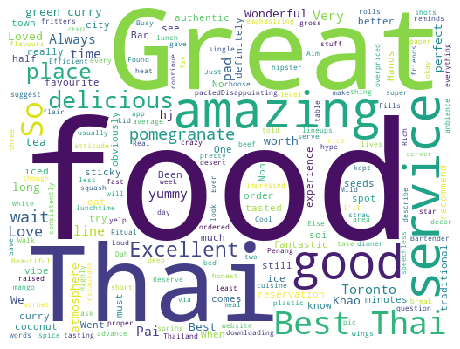

In [334]:
# word cloud library
from wordcloud import WordCloud

# matplotlib library
import matplotlib.pyplot as plt

plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384
                        ).generate(' '.join(Pai_tips[Pai_tips['year'] == ('2018' or '2019' or '2017' or '2016')].text))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.savefig('Plotly-World_Cloud.png')
plt.show()

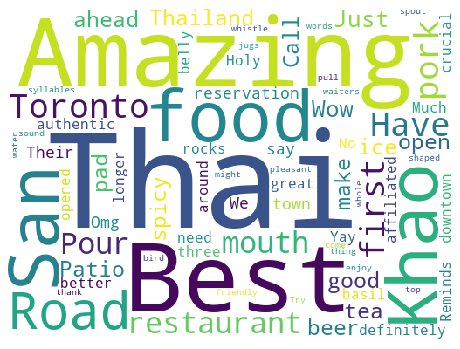

In [335]:
# word cloud library
from wordcloud import WordCloud

# matplotlib library
import matplotlib.pyplot as plt

plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384
                        ).generate(' '.join(Pai_tips[Pai_tips['year'] == ('2014' or '2015')].text))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.savefig('Plotly-World_Cloud.png')
plt.show()

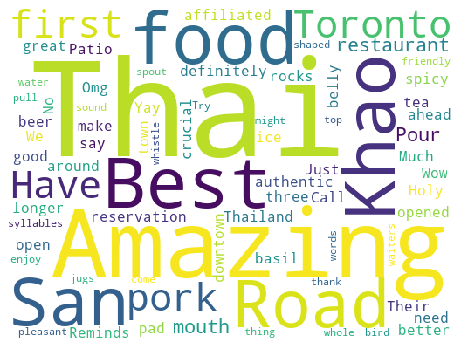

In [325]:
# word cloud library
from wordcloud import WordCloud

# matplotlib library
import matplotlib.pyplot as plt

plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384
                        ).generate(' '.join(Pai_tips[Pai_tips['year'] == '2014'].text))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.savefig('Plotly-World_Cloud.png')
plt.show()

In [302]:
Khao_tips = df_tips[df_tips['business_id'] == 'aLcFhMe6DDJ430zelCpd2A']
Khao_tips = Khao_tips.reset_index(drop = True)
Khao_tips

,user_id,business_id,text,date,compliment_count,year,month,day,time
0,K3bzEv1h7CP-B92bNPhFUA,aLcFhMe6DDJ430zelCpd2A,Must book your table,2012-03-16 02:02:27,0,2012,3,16,02:02:27
1,IxgZ6ybQDwxg_QBXsUVB1A,aLcFhMe6DDJ430zelCpd2A,The Thai Iced Tea is incredibly sweet! Ask the...,2013-08-19 21:45:38,0,2013,8,19,21:45:38
2,GERRIWMslcP4-O6mLErPSQ,aLcFhMe6DDJ430zelCpd2A,"Food getting sloppy, portions smaller and less...",2016-02-21 14:53:59,0,2016,2,21,14:53:59
3,IxgZ6ybQDwxg_QBXsUVB1A,aLcFhMe6DDJ430zelCpd2A,Don't ask for spicy if you CAN'T handle it! Se...,2013-08-19 15:29:15,0,2013,8,19,15:29:15
4,Goa5tRkCURz-53WZAABBEw,aLcFhMe6DDJ430zelCpd2A,Surprise that there is no wait on weekend. Qui...,2013-06-15 17:06:09,0,2013,6,15,17:06:09
...,...,...,...,...,...,...,...,...,...
191,xoMuaAFGWYYiVxBAbCRzNQ,aLcFhMe6DDJ430zelCpd2A,Though they close the doors at 10pm if you get...,2012-02-04 03:16:29,0,2012,2,4,03:16:29
192,pn4NyuwFmg-gEV9155UqhA,aLcFhMe6DDJ430zelCpd2A,Simply the best!!!!!,2015-12-16 13:33:21,0,2015,12,16,13:33:21
193,mdFVOYqX0GlIMx6BroO4RA,aLcFhMe6DDJ430zelCpd2A,Love this place! Really laid back cool atmosph...,2015-07-28 13:17:11,0,2015,7,28,13:17:11
194,6T8Wsve9XkoRkZMtmKE5lQ,aLcFhMe6DDJ430zelCpd2A,"Thai iced tea, fritters, Pad Thai and Khao Soi...",2011-11-04 23:29:15,0,2011,11,4,23:29:15


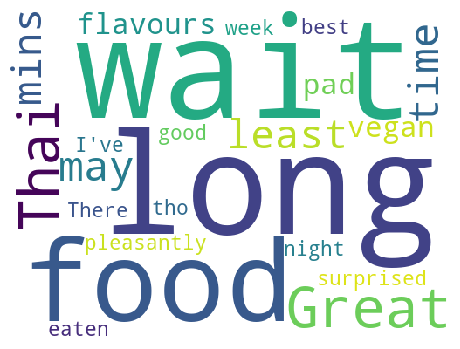

In [332]:
plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384
                        ).generate(' '.join(Khao_tips[Khao_tips['year'] == ('2019' or '2018' or '2017' or '2016')].text))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.savefig('Plotly-World_Cloud.png')
plt.show()

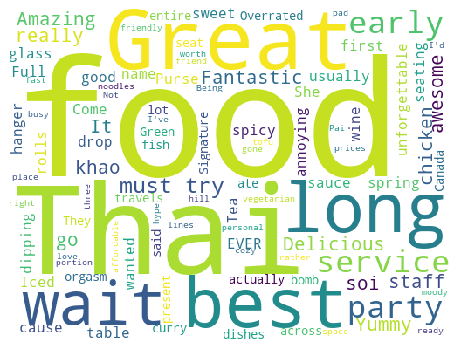

In [321]:
plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384
                        ).generate(' '.join(Khao_tips[Khao_tips['year'] == ('2014'or'2015'or'2013' or '2011'or'2012')].text))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.savefig('Plotly-World_Cloud.png')
plt.show()

They are both the popular Thai food restaurants in Toronto but why the Pai win the market? From the word cloud based on tips, we can basicly see the reason why the popularity of the Khao Tahi food has been decreasing from 2016 to 2019. The reason is nothing with the food. However, the service is the problem. The key word is long wait. This leads to a decrease of the number of consumers with the high probability.

We can see from the word cloud, the pai food is great and servcie is good, ambience is amazing.

### We will look through the positive and negative reviews to discover more meaningful insights behind the text and to further prove this point.

In [333]:
top5_restaurants_reviews

,Borough,business_id,name,address,city,postal_code,LATITUDE,LONGITUDE,stars,attributes,categories,nearest_neighbourhood,user_id,review_star,text,year,month,day,time,rating
21182,Downtown Toronto,ttuEwktrkmh3TUlSFPZqAA,Banh Mi Boys,399 Yonge Street,Toronto,M5B,43.659097,-79.382078,4.0,"{'RestaurantsPriceRange2': '1', 'Alcohol': ""u'...","Vietnamese, Asian Fusion, Restaurants",Church-Yonge Corridor (75),Rja-8hzLdsL7kmYJBeSOVg,5,I always keep coming back for their kimchi fri...,2014,2,24,00:24:33,High Rating
21183,Downtown Toronto,ttuEwktrkmh3TUlSFPZqAA,Banh Mi Boys,399 Yonge Street,Toronto,M5B,43.659097,-79.382078,4.0,"{'RestaurantsPriceRange2': '1', 'Alcohol': ""u'...","Vietnamese, Asian Fusion, Restaurants",Church-Yonge Corridor (75),mXtzBHuB6eri-JLS8mnqvQ,5,Great and affordable place in Toronto! Loved t...,2018,10,4,11:42:18,High Rating
21184,Downtown Toronto,ttuEwktrkmh3TUlSFPZqAA,Banh Mi Boys,399 Yonge Street,Toronto,M5B,43.659097,-79.382078,4.0,"{'RestaurantsPriceRange2': '1', 'Alcohol': ""u'...","Vietnamese, Asian Fusion, Restaurants",Church-Yonge Corridor (75),b9EOHQgkDuWP8WrM3cBzbw,5,This is the second location for Banh Mi Boys a...,2013,12,7,04:50:44,High Rating
21185,Downtown Toronto,ttuEwktrkmh3TUlSFPZqAA,Banh Mi Boys,399 Yonge Street,Toronto,M5B,43.659097,-79.382078,4.0,"{'RestaurantsPriceRange2': '1', 'Alcohol': ""u'...","Vietnamese, Asian Fusion, Restaurants",Church-Yonge Corridor (75),C2B5PcCA9TwxwjR6JjZMug,4,"It's a pretty small and narrow place, good for...",2018,5,28,20:22:23,High Rating
21186,Downtown Toronto,ttuEwktrkmh3TUlSFPZqAA,Banh Mi Boys,399 Yonge Street,Toronto,M5B,43.659097,-79.382078,4.0,"{'RestaurantsPriceRange2': '1', 'Alcohol': ""u'...","Vietnamese, Asian Fusion, Restaurants",Church-Yonge Corridor (75),t2O6rs4fZeY9o6ZY52RyJA,4,Toronto has been blessed with more than its fa...,2014,6,11,15:03:38,High Rating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303744,Downtown Toronto,N93EYZy9R0sdlEvubu94ig,Banh Mi Boys,392 Queen Street W,Toronto,M5V 2A9,43.648827,-79.396970,4.5,"{'Alcohol': ""u'none'"", 'BikeParking': 'True', ...","Sandwiches, Restaurants, Food, Vietnamese, Asi...",Kensington-Chinatown (78),C7lXOTSLUAHG3gkG_Q_39w,4,It's a popular spot for a reason. I've been to...,2016,5,1,14:56:36,High Rating
303745,Downtown Toronto,N93EYZy9R0sdlEvubu94ig,Banh Mi Boys,392 Queen Street W,Toronto,M5V 2A9,43.648827,-79.396970,4.5,"{'Alcohol': ""u'none'"", 'BikeParking': 'True', ...","Sandwiches, Restaurants, Food, Vietnamese, Asi...",Kensington-Chinatown (78),Xn5iLN1v3eLW0e0VPuz1bQ,1,I can't eat anything that has been in brief co...,2019,4,13,19:34:44,Low Rating
303746,Downtown Toronto,N93EYZy9R0sdlEvubu94ig,Banh Mi Boys,392 Queen Street W,Toronto,M5V 2A9,43.648827,-79.396970,4.5,"{'Alcohol': ""u'none'"", 'BikeParking': 'True', ...","Sandwiches, Restaurants, Food, Vietnamese, Asi...",Kensington-Chinatown (78),SAGGHG3CXYozHko6BBKmRA,5,Top notch banh mi and bao buns. Banh Mi Boys ...,2018,6,18,20:20:57,High Rating
303747,Downtown Toronto,N93EYZy9R0sdlEvubu94ig,Banh Mi Boys,392 Queen Street W,Toronto,M5V 2A9,43.648827,-79.396970,4.5,"{'Alcohol': ""u'none'"", 'BikeParking': 'True', ...","Sandwiches, Restaurants, Food, Vietnamese, Asi...",Kensington-Chinatown (78),65yB0ydGXOZ_-T6J_GbKfw,4,I don't know which location was actually first...,2017,2,16,20:39:05,High Rating
